In [4]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

sns.set()
%matplotlib inline

In [5]:
train_df = pd.read_csv(r"C:\Users\Aman\OneDrive\Desktop\TitanicData\train.csv")

In [6]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
train_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [10]:
train_df.var()

PassengerId    66231.000000
Survived           0.236772
Pclass             0.699015
Age              211.019125
SibSp              1.216043
Parch              0.649728
Fare            2469.436846
dtype: float64

In [12]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Checking For Null Values

In [14]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

EXPLORATORY DATA ANALYSIS (EDA)

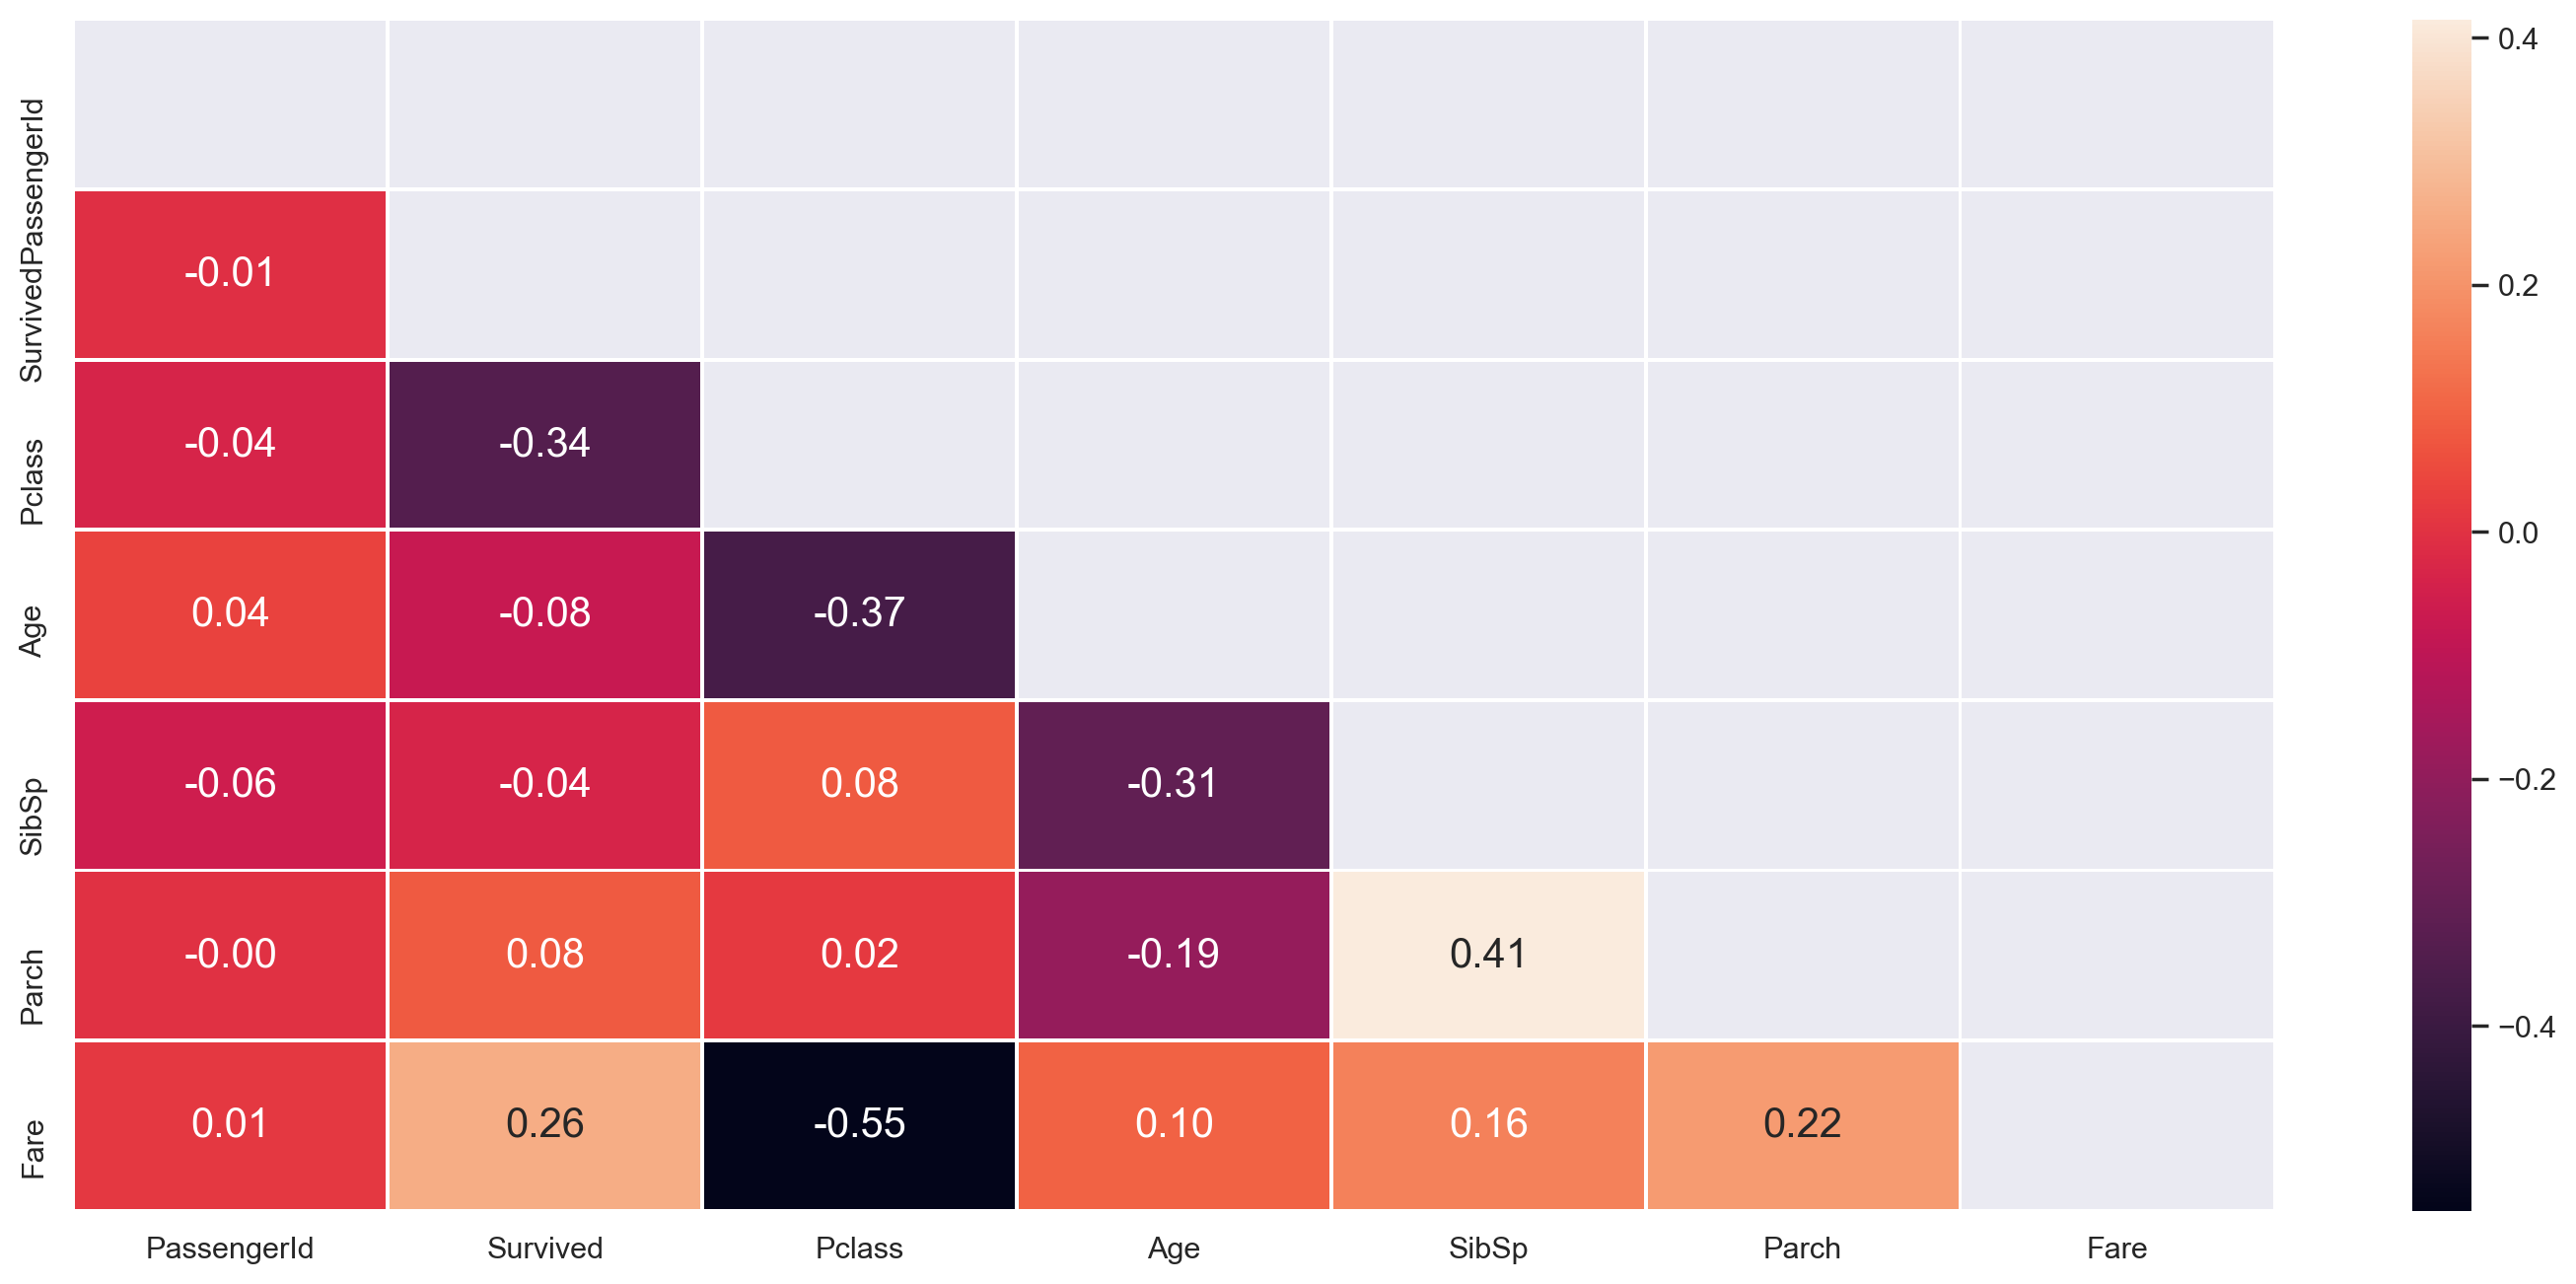

In [17]:
#heat map

plt.figure(figsize = (18, 8),dpi = 200)

corr = train_df.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))

sns.heatmap(corr, mask = mask, annot = True, fmt = '.2f', linewidths = 1, annot_kws = {'size' : 15})
plt.show()

Survived Column

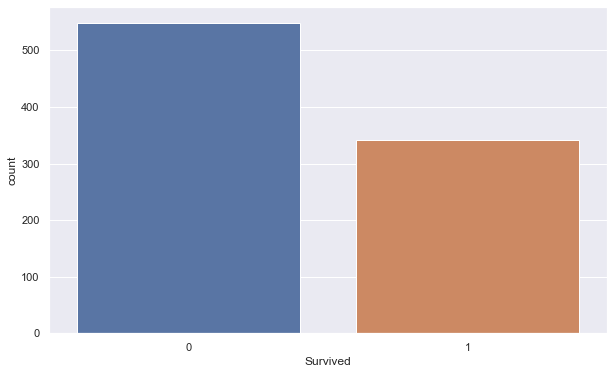

In [20]:
plt.figure(figsize = (10,6))

sns.countplot('Survived', data = train_df)
plt.show()

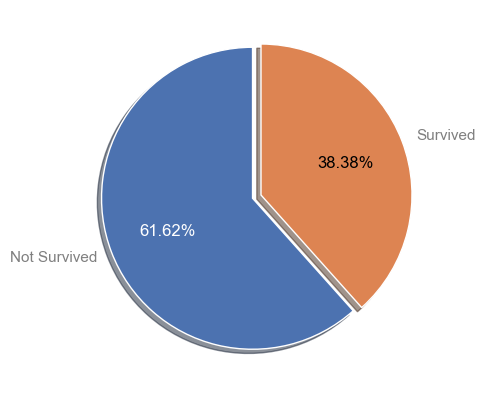

In [21]:
values = train_df['Survived'].value_counts()
labels = ['Not Survived', 'Survived']

fig, ax = plt.subplots(figsize = (5, 5), dpi = 100)
explode = (0, 0.06)

patches, texts, autotexts = ax.pie(values, labels = labels, autopct = '%1.2f%%', shadow = True,
                                   startangle = 90, explode = explode)

plt.setp(texts, color = 'grey')
plt.setp(autotexts, size = 12, color = 'white')
autotexts[1].set_color('black')
plt.show()

Pclass Column

In [23]:
train_df.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [26]:
train_df.groupby(['Pclass', 'Survived'])['Survived'].count()

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

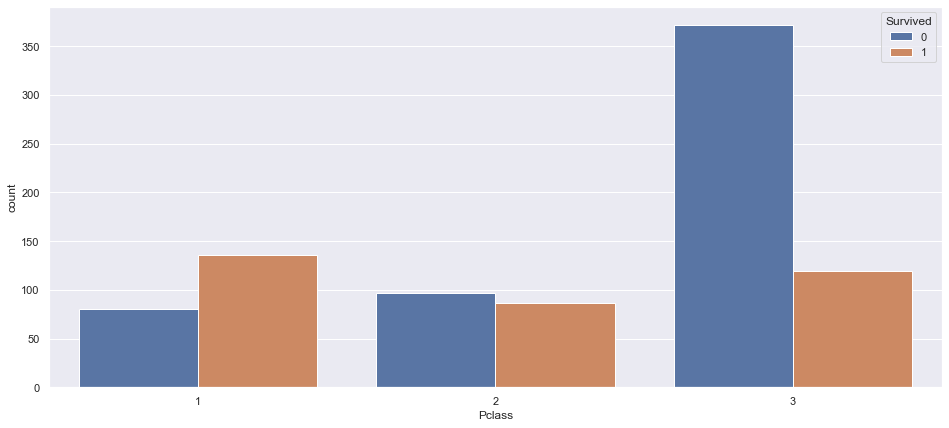

In [27]:
plt.figure(figsize = (16, 7))

sns.countplot('Pclass', hue = 'Survived', data = train_df)
plt.show()

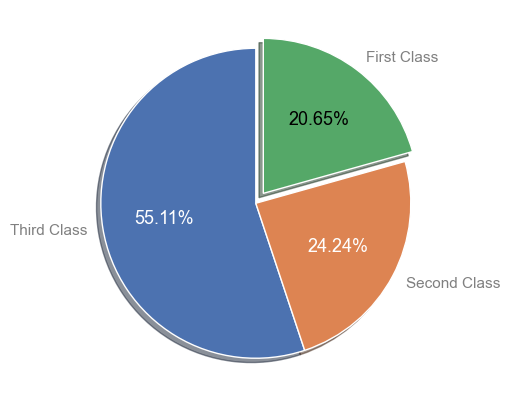

In [28]:
values = train_df['Pclass'].value_counts()
labels = ['Third Class', 'Second Class', 'First Class']
explode = (0, 0, 0.08)

fig, ax = plt.subplots(figsize = (5, 6), dpi = 100)
patches, texts, autotexts = ax.pie(values, labels = labels, autopct = '%1.2f%%', shadow = True,
                                   startangle = 90, explode = explode)

plt.setp(texts, color = 'grey')
plt.setp(autotexts, size = 13, color = 'white')
autotexts[2].set_color('black')
plt.show()

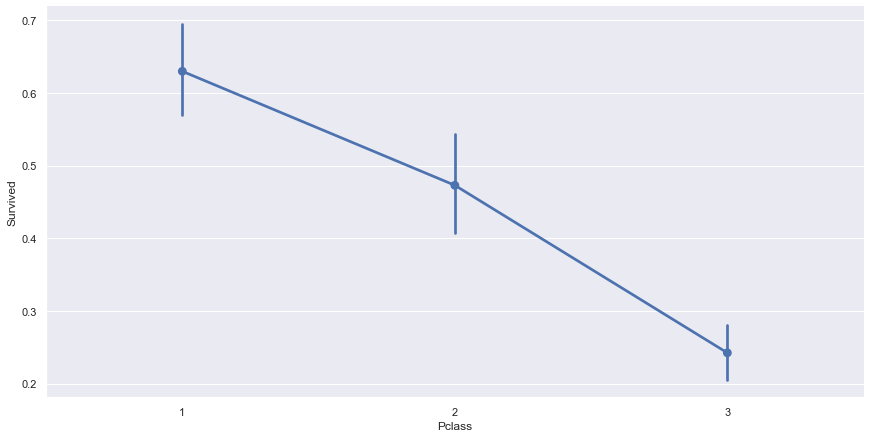

In [29]:
sns.catplot('Pclass', 'Survived', kind = 'point', data = train_df, height = 6, aspect = 2)
plt.show()

Name Column

In [30]:
train_df.Name.value_counts()

Slemen, Mr. Richard James                              1
Louch, Mrs. Charles Alexander (Alice Adelaide Slow)    1
Naidenoff, Mr. Penko                                   1
Wick, Miss. Mary Natalie                               1
Newell, Miss. Marjorie                                 1
                                                      ..
Ford, Miss. Doolina Margaret "Daisy"                   1
O'Sullivan, Miss. Bridget Mary                         1
Baclini, Miss. Helene Barbara                          1
Jalsevac, Mr. Ivan                                     1
Elias, Mr. Dibo                                        1
Name: Name, Length: 891, dtype: int64

In [32]:
len(train_df.Name.unique()), train_df.shape

(891, (891, 12))

Sex Column

In [34]:
train_df.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [35]:
train_df.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

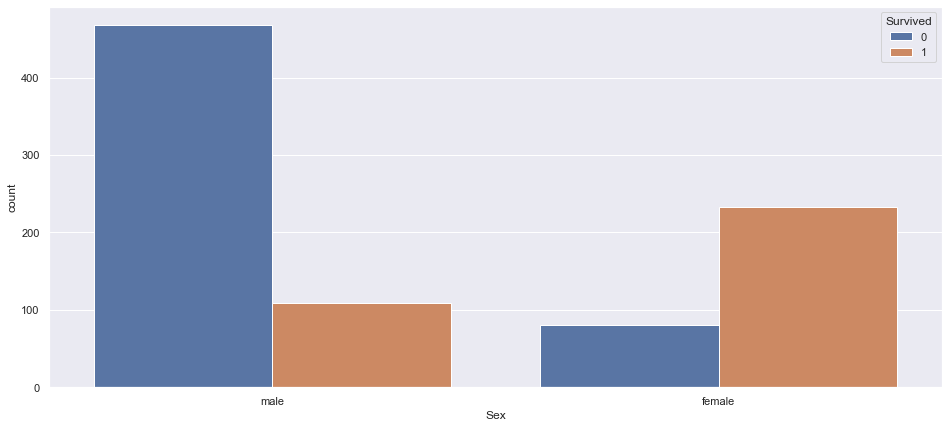

In [36]:
plt.figure(figsize = (16, 7))

sns.countplot('Sex', hue = 'Survived', data = train_df)
plt.show()

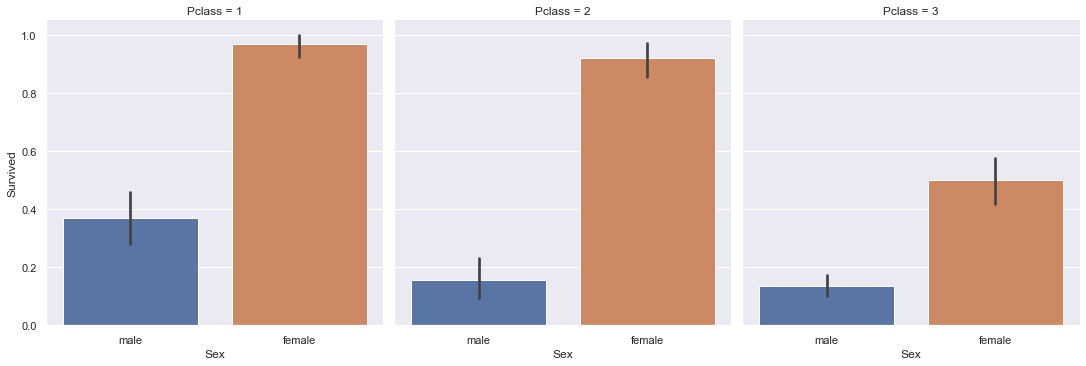

In [37]:
sns.catplot(x = 'Sex', y = 'Survived', data = train_df, kind = 'bar', col = 'Pclass')
plt.show()

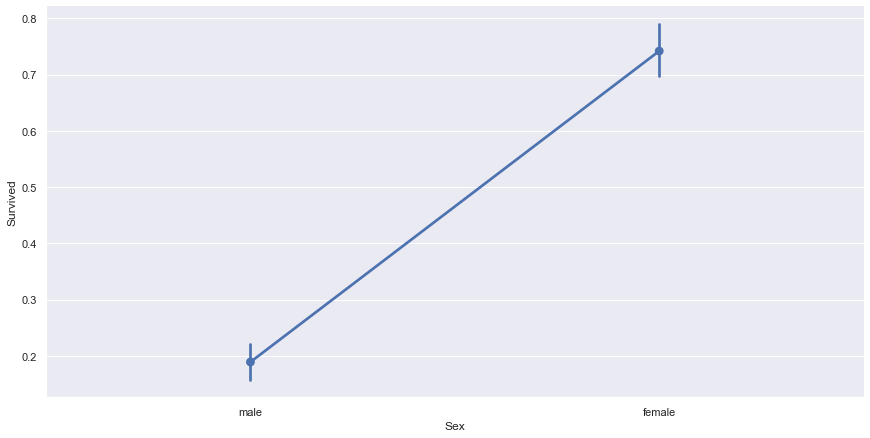

In [38]:
sns.catplot(x = 'Sex', y = 'Survived', data = train_df, kind = 'point', height = 6, aspect =2)
plt.show()

AGE COLUMN

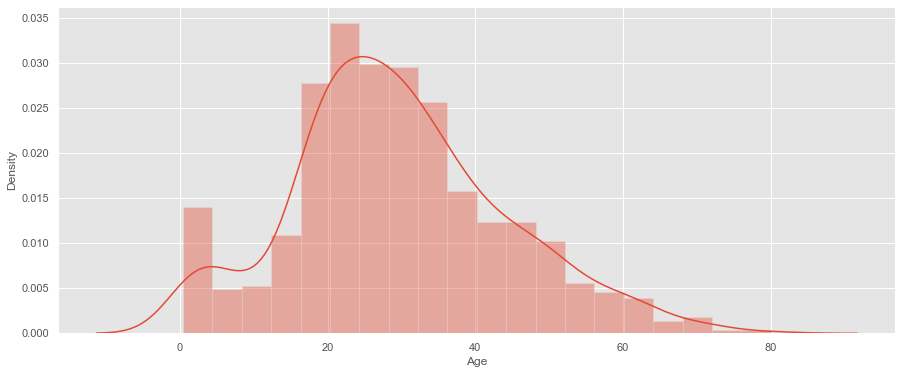

In [40]:
plt.figure(figsize = (15, 6))
plt.style.use('ggplot')

sns.distplot(train_df['Age'])
plt.show()

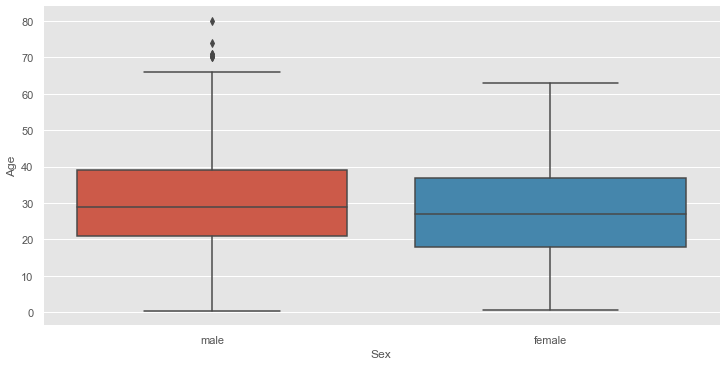

In [41]:
sns.catplot(x = 'Sex', y = 'Age', kind = 'box', data = train_df, height = 5, aspect = 2)
plt.show()

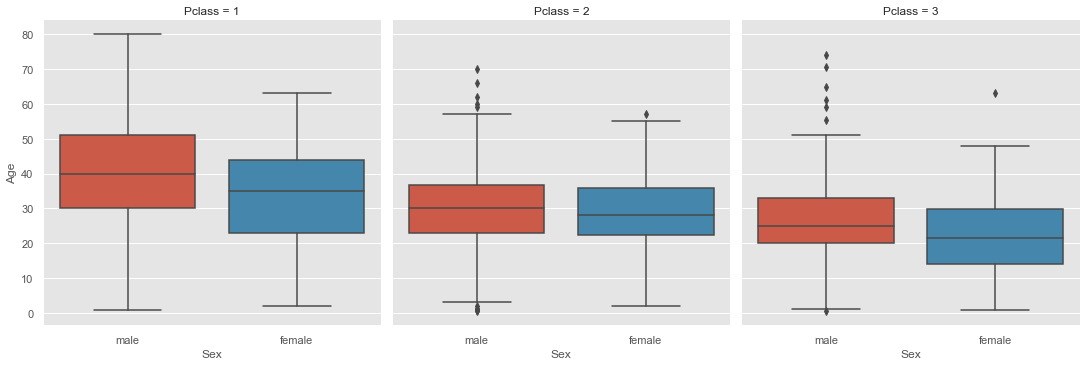

In [42]:
sns.catplot(x = 'Sex', y = 'Age', kind = 'box', data = train_df, col = 'Pclass')
plt.show()

Fare column

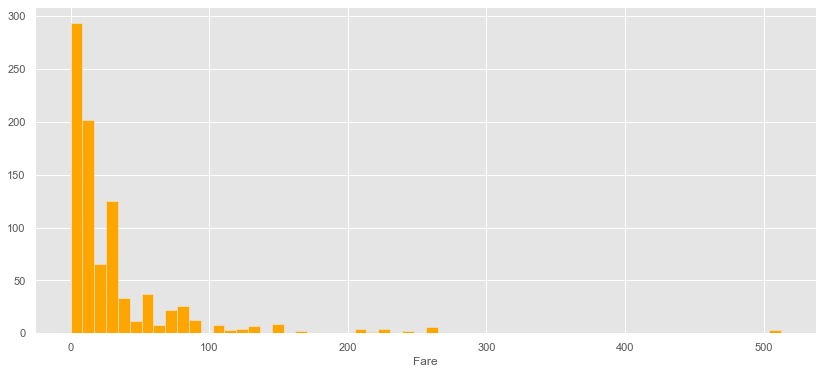

In [44]:
plt.figure(figsize = (14, 6))

plt.hist(train_df.Fare, bins = 60, color = 'orange')
plt.xlabel('Fare')
plt.show()

We can see that lot of zero values are there in Fare column so we will replace zero values with mean value of Fare column

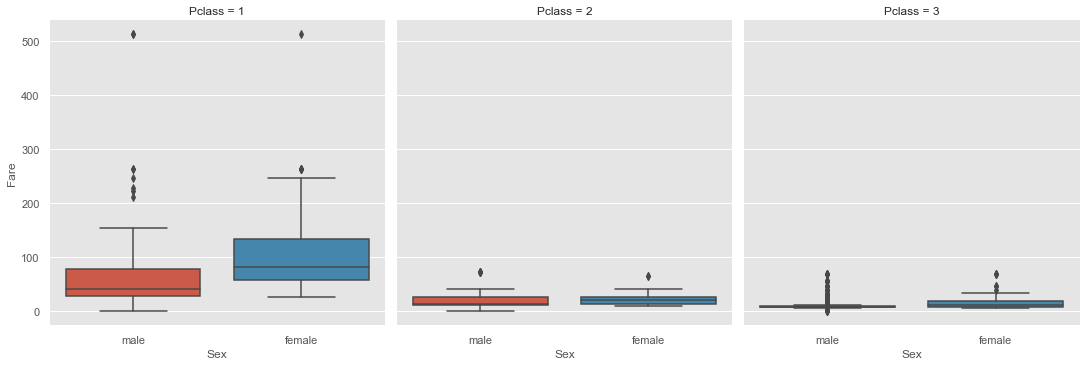

In [45]:
sns.catplot(x = 'Sex', y = 'Fare', data = train_df, kind = 'box', col = 'Pclass')
plt.show()

SibSp Column

In [46]:
train_df['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

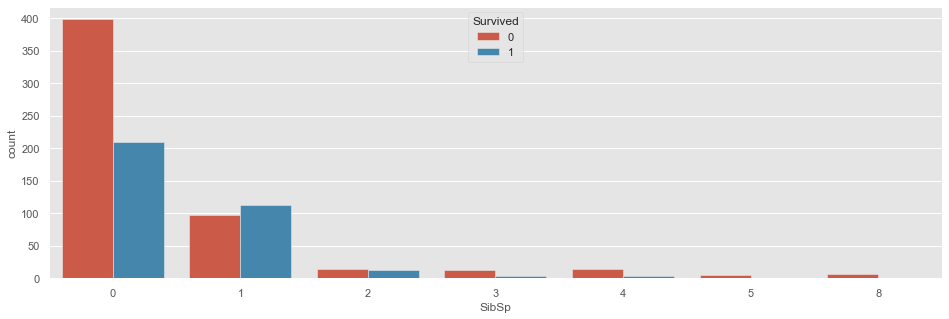

In [50]:
plt.figure(figsize = (16, 5))

sns.countplot(x = 'SibSp', data = train_df, hue = 'Survived')

plt.show()

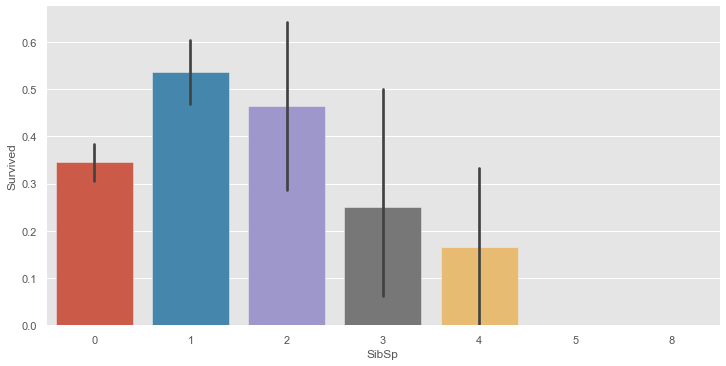

In [51]:
sns.catplot(x = 'SibSp', y = 'Survived', kind = 'bar', data = train_df, height = 5, aspect =2)
plt.show()

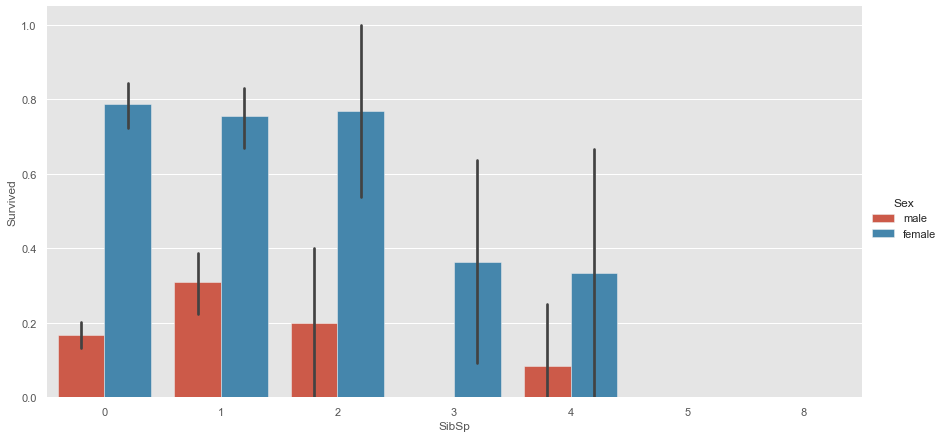

In [52]:
sns.catplot(x = 'SibSp', y = 'Survived', kind = 'bar', hue = 'Sex', data = train_df, height = 6, aspect = 2)
plt.show()

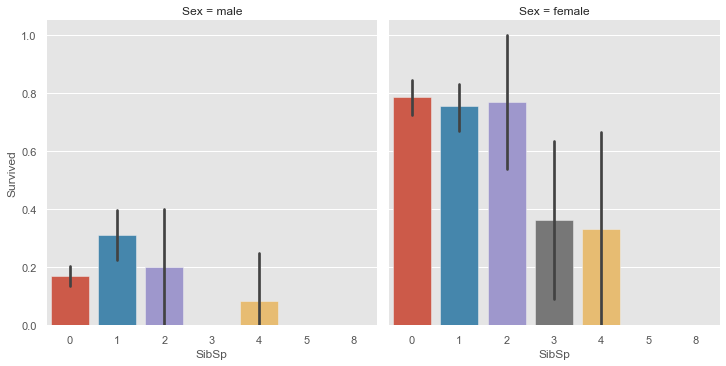

In [53]:
sns.catplot(x = 'SibSp',  y = 'Survived', kind = 'bar', col = 'Sex', data = train_df)
plt.show()

Parch Columns

In [54]:
train_df.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

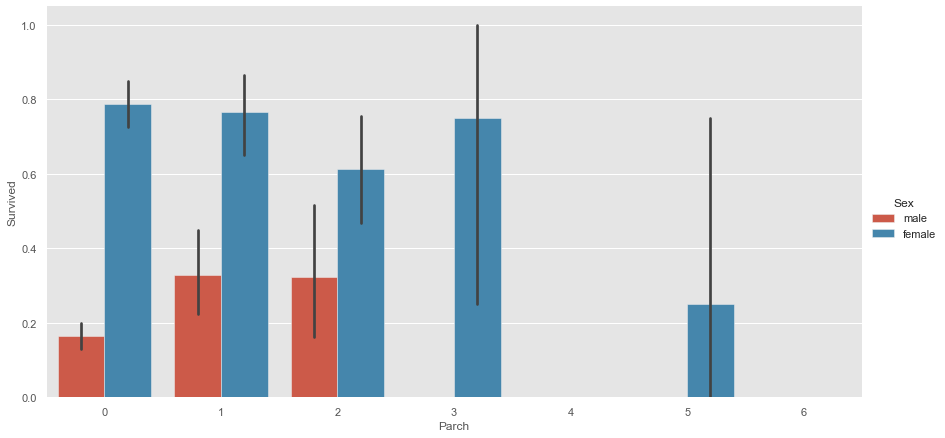

In [55]:
sns.catplot(x = 'Parch', y = 'Survived', data = train_df, hue = 'Sex', kind = 'bar', height = 6, aspect = 2)
plt.show()

Ticket Column

In [56]:
train_df.Ticket.value_counts()

347082      7
CA. 2343    7
1601        7
CA 2144     6
3101295     6
           ..
240929      1
2672        1
392091      1
3411        1
13213       1
Name: Ticket, Length: 681, dtype: int64

In [57]:
len(train_df.Ticket.unique())

681

Embarked Columns

In [58]:
train_df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

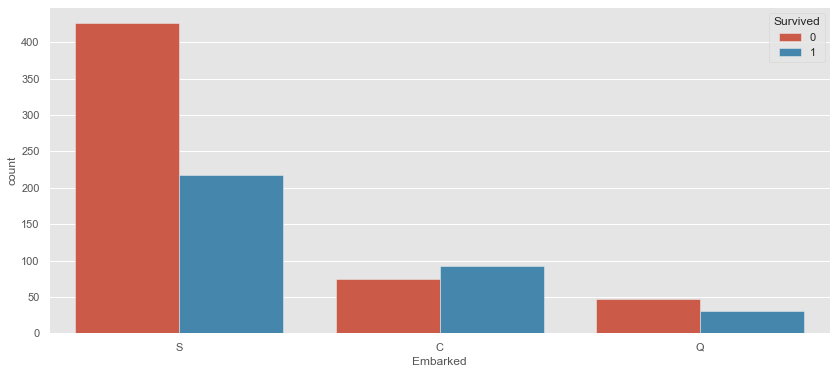

In [59]:
plt.figure(figsize = (14, 6))

sns.countplot('Embarked', hue = 'Survived', data = train_df)
plt.show()

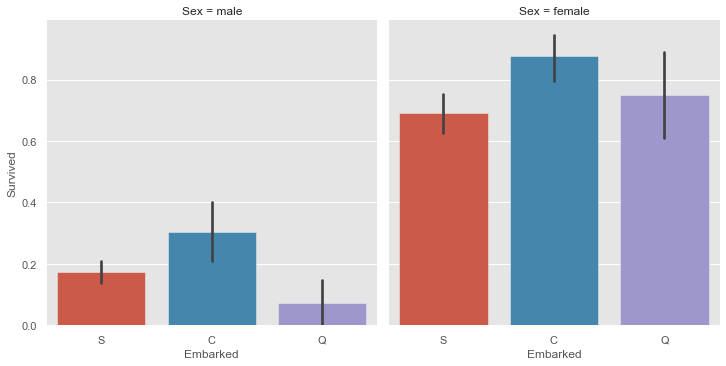

In [60]:
sns.catplot(x = 'Embarked', y = 'Survived', kind = 'bar', data = train_df, col = 'Sex')
plt.show()

Findings From EDA
- Females Survived more than Males.
- Passengers Travelling in Higher Class Survived More than Passengers travelling in Lower Class.
- Name column is having all unique values so this column is not suitable for prediction, we have to drop it.
- In First Class Females were more than Males, that's why Fare of Females Passengers were high.
- Survival Rate is higher for those who were travelling with siblings or spouses.
- Passengers travelling with parents or children have higher survival rate.
- Ticket column is not useful and does not have an impact on survival.
- Cabin column have a lot of null values , it will be better to drop this column.
- Passengers travelling from Cherbourg port survived more than passengers travelling from other two ports.

Data Pre Processing

In [61]:
# dropping useless columns

train_df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis = 1, inplace = True)

In [62]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [63]:
train_df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [64]:
# replacing Zero values of "Fare" column with mean of column

train_df['Fare'] = train_df['Fare'].replace(0, train_df['Fare'].mean())

In [65]:
# filling null values of "Age" column with mean value of the column

train_df['Age'].fillna(train_df['Age'].mean(), inplace = True)

In [66]:
# filling null values of "Embarked" column with mode value of the column

train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace = True)

In [67]:
# checking for null values after filling null values

train_df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [68]:
train_df['Sex'] = train_df['Sex'].apply(lambda val: 1 if val == 'male' else 0)

In [69]:
train_df['Embarked'] = train_df['Embarked'].map({'S' : 0, 'C': 1, 'Q': 2})

In [70]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,0
1,1,1,0,38.0,1,0,71.2833,1
2,1,3,0,26.0,0,0,7.9250,0
3,1,1,0,35.0,1,0,53.1000,0
4,0,3,1,35.0,0,0,8.0500,0


In [71]:
train_df.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,29.699118,0.523008,0.381594,32.746366,0.361392
std,0.486592,0.836071,0.477990,13.002015,1.102743,0.806057,49.514272,0.635673
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,4.012500,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.925000,0.000000
50%,0.000000,3.000000,1.000000,29.699118,0.000000,0.000000,15.100000,0.000000
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,32.204208,1.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000


In [72]:
train_df.var()

Survived       0.236772
Pclass         0.699015
Sex            0.228475
Age          169.052400
SibSp          1.216043
Parch          0.649728
Fare        2451.663181
Embarked       0.404081
dtype: float64

Variance in "Fare" column is very high so we have to normalize these columns.

In [73]:
train_df['Age'] = np.log(train_df['Age'])
train_df['Fare'] = np.log(train_df['Fare'])


In [76]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,3.091042,1,0,1.981001,0
1,1,1,0,3.637586,1,0,4.266662,1
2,1,3,0,3.258097,0,0,2.070022,0
3,1,1,0,3.555348,1,0,3.972177,0
4,0,3,1,3.555348,0,0,2.085672,0


In [77]:
train_df.var()

Survived    0.236772
Pclass      0.699015
Sex         0.228475
Age         0.499292
SibSp       1.216043
Parch       0.649728
Fare        0.866881
Embarked    0.404081
dtype: float64

Now training data looks much better let's take a look at test data.

In [78]:
test_df = pd.read_csv(r"C:\Users\Aman\OneDrive\Desktop\TitanicData\test.csv")

In [81]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Performing same steps on test data

In [83]:
# dropping useless columns

test_df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis = 1, inplace = True)

In [84]:
# filling null values of "Age" column with mean value of the column

test_df['Age'].fillna(test_df['Age'].mean(), inplace = True)

In [85]:
# replacing Zero values of "Fare" column with mean of column

test_df['Fare'] = test_df['Fare'].replace(0, test_df['Fare'].mean())

In [86]:
# filling null values of "Embarked" column with mode value of the column

test_df['Embarked'].fillna(test_df['Embarked'].mode()[0], inplace = True)

In [88]:
test_df.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        1
Embarked    0
dtype: int64

In [89]:
# filling null values of "Fare" column with mean value of the column

test_df['Fare'].fillna(test_df['Fare'].mean(), inplace = True)

In [90]:
test_df['Sex'] = test_df['Sex'].apply(lambda val: 1 if val == 'male' else 0)

In [92]:
test_df['Embarked'] = test_df['Embarked'].map({'S' : 0, 'C' : 1, 'Q' : 2})

In [93]:
test_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,2
1,3,0,47.0,1,0,7.0000,0
2,2,1,62.0,0,0,9.6875,2
3,3,1,27.0,0,0,8.6625,0
4,3,0,22.0,1,1,12.2875,0


In [94]:
test_df['Age'] = np.log(test_df['Age'])
test_df['Fare'] = np.log(test_df['Fare'])

In [95]:
test_df.var()

Pclass      0.708690
Sex         0.231960
Age         0.482596
SibSp       0.804178
Parch       0.963203
Fare        0.973274
Embarked    0.469932
dtype: float64

In [97]:
test_df.isnull().any()

Pclass      False
Sex         False
Age         False
SibSp       False
Parch       False
Fare        False
Embarked    False
dtype: bool

In [98]:
test_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,3.540959,0,0,2.057860,2
1,3,0,3.850148,1,0,1.945910,0
2,2,1,4.127134,0,0,2.270836,2
3,3,1,3.295837,0,0,2.159003,0
4,3,0,3.091042,1,1,2.508582,0


#### NOW BOTH THE TRAINING NAD TEST DATA SET HAS BEEN CLEANED AND PREPROCESED, LETS START WITH MODELLING

In [99]:
X = train_df.drop(['Survived'],axis= 1)
y = train_df['Survived']


Splitting training and test set 

In [101]:
from sklearn.model_selection import train_test_split

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Logistic Regression

In [104]:
from sklearn.linear_model import LogisticRegression

In [105]:
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [109]:
# accuracy score, confusion matrix, classification report of logistic regression 

from sklearn.metrics import accuracy_score, classification_report, plot_confusion_matrix, confusion_matrix

lr_acc = accuracy_score(y_test, lr.predict(X_test))

print(f"Training Accuracy of Logistic Regression is {accuracy_score(y_train, lr.predict(X_train))}")
print(f"Test Accuracy of Logistic Regression is {lr_acc}")

print(confusion_matrix(y_test, lr.predict(X_test)))
print(classification_report(y_test, lr.predict(X_test)))

Training Accuracy of Logistic Regression is 0.8117977528089888
Test Accuracy of Logistic Regression is 0.8212290502793296
[[96 14]
 [18 51]]
              precision    recall  f1-score   support

           0       0.84      0.87      0.86       110
           1       0.78      0.74      0.76        69

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



In [111]:
#hyper parameter tuning of logistic regression

from sklearn.model_selection import GridSearchCV

grid_param = { 'penalty' : ['l1', 'l2'],
             'C' : [0.001,0.01,0.1,0.005,0.5,1,10]}

grid_search_lr = GridSearchCV(lr, grid_param, cv= 5, n_jobs = -1, verbose = 1)
grid_search_lr.fit(X_train,y_train)

Fitting 5 folds for each of 14 candidates, totalling 70 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:    2.6s finished


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 0.005, 0.5, 1, 10],
                         'penalty': ['l1', 'l2']},
             verbose=1)

In [112]:
grid_search_lr.best_params_

{'C': 0.1, 'penalty': 'l2'}

In [113]:
grid_search_lr.best_score_

0.8117896188318724

In [114]:
lr = grid_search_lr.best_estimator_

In [118]:
# accuracy score, confusion matrix and classification report of logistic regression

lr_acc = accuracy_score(y_test, lr.predict(X_test))

print(f"Training Accuracy of Logistic Regression is {accuracy_score(y_train, lr.predict(X_train))}")
print(f"Test Accuracy of Logistic Regression is {lr_acc}")

print(confusion_matrix(y_test, lr.predict(X_test)))
print(classification_report(y_test, lr.predict(X_test)))

Training Accuracy of Logistic Regression is 0.8230337078651685
Test Accuracy of Logistic Regression is 0.8212290502793296
[[98 12]
 [20 49]]
              precision    recall  f1-score   support

           0       0.83      0.89      0.86       110
           1       0.80      0.71      0.75        69

    accuracy                           0.82       179
   macro avg       0.82      0.80      0.81       179
weighted avg       0.82      0.82      0.82       179



After hyper parameter tuning recall, f1-score and test-accuracy increases a bit.

### KNN

In [119]:
from sklearn.neighbors import KNeighborsClassifier

In [120]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [124]:
# accuracy score, confusion matrix and classification report of logistic regression

knn_acc = accuracy_score(y_test, knn.predict(X_test))

print(f"Training Accuracy of KNN is {accuracy_score(y_train, knn.predict(X_train))}")
print(f"Test Accuracy of KNN is {knn_acc}")

print(confusion_matrix(y_test, knn.predict(X_test)))
print(classification_report(y_test, knn.predict(X_test)))

Training Accuracy of KNN is 0.8567415730337079
Test Accuracy of KNN is 0.7988826815642458
[[94 16]
 [20 49]]
              precision    recall  f1-score   support

           0       0.82      0.85      0.84       110
           1       0.75      0.71      0.73        69

    accuracy                           0.80       179
   macro avg       0.79      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179



### Decision Tree  Classifier

In [125]:
from sklearn.tree import DecisionTreeClassifier

In [126]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

In [127]:
# accuracy score, confusion matrix and classification report of logistic regression

dtc_acc = accuracy_score(y_test, dtc.predict(X_test))

print(f"Training Accuracy of KNN is {accuracy_score(y_train, dtc.predict(X_train))}")
print(f"Test Accuracy of KNN is {dtc_acc}")

print(confusion_matrix(y_test, dtc.predict(X_test)))
print(classification_report(y_test, dtc.predict(X_test)))

Training Accuracy of KNN is 0.9817415730337079
Test Accuracy of KNN is 0.8044692737430168
[[98 12]
 [23 46]]
              precision    recall  f1-score   support

           0       0.81      0.89      0.85       110
           1       0.79      0.67      0.72        69

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179



In [128]:
# hyper parameter tuning of decision tree 

grid_param = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [3, 5, 7, 10],
    'splitter' : ['best', 'random'],
    'min_samples_leaf' : [1, 2, 3, 5, 7],
    'min_samples_split' : [1, 2, 3, 5, 7],
    'max_features' : ['auto', 'sqrt', 'log2']
}

grid_search_dtc = GridSearchCV(dtc, grid_param, cv = 5, n_jobs = -1, verbose = 1)
grid_search_dtc.fit(X_train, y_train)

Fitting 5 folds for each of 1200 candidates, totalling 6000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 1680 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done 5680 tasks      | elapsed:   10.4s
[Parallel(n_jobs=-1)]: Done 6000 out of 6000 | elapsed:   10.7s finished


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 5, 7],
                         'min_samples_split': [1, 2, 3, 5, 7],
                         'splitter': ['best', 'random']},
             verbose=1)

In [129]:
grid_search_dtc.best_score_

0.8230079779375554

In [130]:
grid_search_dtc.best_params_

{'criterion': 'entropy',
 'max_depth': 7,
 'max_features': 'sqrt',
 'min_samples_leaf': 7,
 'min_samples_split': 2,
 'splitter': 'best'}

In [131]:
dtc = DecisionTreeClassifier(criterion= 'entropy', max_depth= 7, max_features= 'sqrt', 
                             min_samples_leaf= 7, min_samples_split= 2, splitter= 'best')

dtc.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=7, max_features='sqrt',
                       min_samples_leaf=7)

In [132]:
# accuracy score, confusion matrix and classification report of decision tree

dtc_acc = accuracy_score(y_test, dtc.predict(X_test))

print(f"Training Accuracy of Decision Tree Classifier is {accuracy_score(y_train, dtc.predict(X_train))}")
print(f"Test Accuracy of Decision Tree Classifier is {dtc_acc} \n")

print(f"{confusion_matrix(y_test, dtc.predict(X_test))}\n")
print(classification_report(y_test, dtc.predict(X_test)))

Training Accuracy of Decision Tree Classifier is 0.8286516853932584
Test Accuracy of Decision Tree Classifier is 0.8156424581005587 

[[100  10]
 [ 23  46]]

              precision    recall  f1-score   support

           0       0.81      0.91      0.86       110
           1       0.82      0.67      0.74        69

    accuracy                           0.82       179
   macro avg       0.82      0.79      0.80       179
weighted avg       0.82      0.82      0.81       179



### Random Forest Classifier

In [133]:
from sklearn.ensemble import RandomForestClassifier

rd_clf = RandomForestClassifier()
rd_clf.fit(X_train,y_train)

RandomForestClassifier()

In [134]:
# accuracy score, confusion matrix and classification report of decision tree

rd_clf_acc = accuracy_score(y_test, rd_clf.predict(X_test))

print(f"Training Accuracy of Decision Tree Classifier is {accuracy_score(y_train, rd_clf.predict(X_train))}")
print(f"Test Accuracy of Decision Tree Classifier is {rd_clf_acc} \n")

print(f"{confusion_matrix(y_test, rd_clf.predict(X_test))}\n")
print(classification_report(y_test, rd_clf.predict(X_test)))

Training Accuracy of Decision Tree Classifier is 0.9817415730337079
Test Accuracy of Decision Tree Classifier is 0.8547486033519553 

[[103   7]
 [ 19  50]]

              precision    recall  f1-score   support

           0       0.84      0.94      0.89       110
           1       0.88      0.72      0.79        69

    accuracy                           0.85       179
   macro avg       0.86      0.83      0.84       179
weighted avg       0.86      0.85      0.85       179



### Ada Boost Classifier

In [135]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(base_estimator= dtc)
ada.fit(X_train,y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                         max_depth=7,
                                                         max_features='sqrt',
                                                         min_samples_leaf=7))

In [136]:
# accuracy score, confusion matrix and classification report of decision tree

ada_acc = accuracy_score(y_test, ada.predict(X_test))

print(f"Training Accuracy of Decision Tree Classifier is {accuracy_score(y_train, ada.predict(X_train))}")
print(f"Test Accuracy of Decision Tree Classifier is {ada_acc} \n")

print(f"{confusion_matrix(y_test, ada.predict(X_test))}\n")
print(classification_report(y_test, ada.predict(X_test)))

Training Accuracy of Decision Tree Classifier is 0.9817415730337079
Test Accuracy of Decision Tree Classifier is 0.7932960893854749 

[[94 16]
 [21 48]]

              precision    recall  f1-score   support

           0       0.82      0.85      0.84       110
           1       0.75      0.70      0.72        69

    accuracy                           0.79       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179



In [137]:
# hyper parameter for Ada boost

grid_param = { 'n_estimators' : [100,120,150,180,200],
              'learning_rate' : [0.1,0.01,1,10],
              'algorithm' : ['SAMME' , 'SAMME,R']
    
}

In [138]:
grid_search_ada = GridSearchCV(ada, grid_param, cv = 5, n_jobs= -1, verbose = 1)
grid_search_ada.fit(X_train,y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    4.1s finished


GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                                                max_depth=7,
                                                                                max_features='sqrt',
                                                                                min_samples_leaf=7)),
             n_jobs=-1,
             param_grid={'algorithm': ['SAMME', 'SAMME,R'],
                         'learning_rate': [0.1, 0.01, 1, 10],
                         'n_estimators': [100, 120, 150, 180, 200]},
             verbose=1)

In [139]:
grid_search_ada.best_params_

{'algorithm': 'SAMME', 'learning_rate': 0.01, 'n_estimators': 150}

In [140]:
grid_search_ada.best_score_

0.8244164286417808

In [141]:
ada  = AdaBoostClassifier(base_estimator=dtc, algorithm= 'SAMME' , learning_rate= 0.01,
                          n_estimators= 200) 
ada.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                         max_depth=7,
                                                         max_features='sqrt',
                                                         min_samples_leaf=7),
                   learning_rate=0.01, n_estimators=200)

In [142]:
# accuracy score, confusion matrix and classification report of decision tree

ada_acc = accuracy_score(y_test, ada.predict(X_test))

print(f"Training Accuracy of Decision Tree Classifier is {accuracy_score(y_train, ada.predict(X_train))}")
print(f"Test Accuracy of Decision Tree Classifier is {ada_acc} \n")

print(f"{confusion_matrix(y_test, ada.predict(X_test))}\n")
print(classification_report(y_test, ada.predict(X_test)))

Training Accuracy of Decision Tree Classifier is 0.8679775280898876
Test Accuracy of Decision Tree Classifier is 0.8435754189944135 

[[105   5]
 [ 23  46]]

              precision    recall  f1-score   support

           0       0.82      0.95      0.88       110
           1       0.90      0.67      0.77        69

    accuracy                           0.84       179
   macro avg       0.86      0.81      0.82       179
weighted avg       0.85      0.84      0.84       179



### Gradient Boost Clasifier

In [143]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier()
gb.fit(X_train,y_train)

GradientBoostingClassifier()

In [144]:
# accuracy score, confusion matrix and classification report of decision tree

gb_acc = accuracy_score(y_test, gb.predict(X_test))

print(f"Training Accuracy of Decision Tree Classifier is {accuracy_score(y_train, gb.predict(X_train))}")
print(f"Test Accuracy of Decision Tree Classifier is {gb_acc} \n")

print(f"{confusion_matrix(y_test, gb.predict(X_test))}\n")
print(classification_report(y_test, gb.predict(X_test)))

Training Accuracy of Decision Tree Classifier is 0.898876404494382
Test Accuracy of Decision Tree Classifier is 0.8379888268156425 

[[103   7]
 [ 22  47]]

              precision    recall  f1-score   support

           0       0.82      0.94      0.88       110
           1       0.87      0.68      0.76        69

    accuracy                           0.84       179
   macro avg       0.85      0.81      0.82       179
weighted avg       0.84      0.84      0.83       179



### XgBoost

In [145]:
from xgboost import XGBClassifier

xgb = XGBClassifier(booster = 'gbtree', learning_rate = 0.1, max_depth = 5, n_estimators = 180)
xgb.fit(X_train, y_train)

[13:46:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=180, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [146]:
# accuracy score, confusion matrix and classification report of xgboost

xgb_acc = accuracy_score(y_test, xgb.predict(X_test))

print(f"Training Accuracy of Decision Tree Classifier is {accuracy_score(y_train, xgb.predict(X_train))}")
print(f"Test Accuracy of Decision Tree Classifier is {xgb_acc} \n")

print(f"{confusion_matrix(y_test, xgb.predict(X_test))}\n")
print(classification_report(y_test, xgb.predict(X_test)))

Training Accuracy of Decision Tree Classifier is 0.9339887640449438
Test Accuracy of Decision Tree Classifier is 0.8603351955307262 

[[103   7]
 [ 18  51]]

              precision    recall  f1-score   support

           0       0.85      0.94      0.89       110
           1       0.88      0.74      0.80        69

    accuracy                           0.86       179
   macro avg       0.87      0.84      0.85       179
weighted avg       0.86      0.86      0.86       179



In [147]:
models = pd.DataFrame({
    'Model' : ['Logistic Regression', 'KNN', 'Decision Tree Classifier', 'Random Forest Classifier','Ada Boost Classifier',
             'Gradient Boosting Classifier', 'XgBoost'],
    'Score' : [lr_acc, knn_acc, dtc_acc, rd_clf_acc, ada_acc, gb_acc, xgb_acc]
})


models.sort_values(by = 'Score', ascending = False)

,Model,Score
6,XgBoost,0.860335
3,Random Forest Classifier,0.854749
4,Ada Boost Classifier,0.843575
5,Gradient Boosting Classifier,0.837989
0,Logistic Regression,0.821229
2,Decision Tree Classifier,0.815642
1,KNN,0.798883


XgBoost gives best result so we use XgBoost for predictions.

In [148]:
## predictions 

predictions = xgb.predict(test_df)

In [150]:
pred = pd.DataFrame(predictions)
sub_df = pd.read_csv(r"C:\Users\Aman\OneDrive\Desktop\TitanicData\gender_submission.csv")
sub_df['Survived'] = pred
sub_df.to_csv('Submission.csv', index = False)